<a href="https://colab.research.google.com/github/Logaratchagan/Logaratchagan/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/1000_Startups_price_prediction.csv");df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(1000, 5)

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Figure size 1000x500 with 0 Axes>

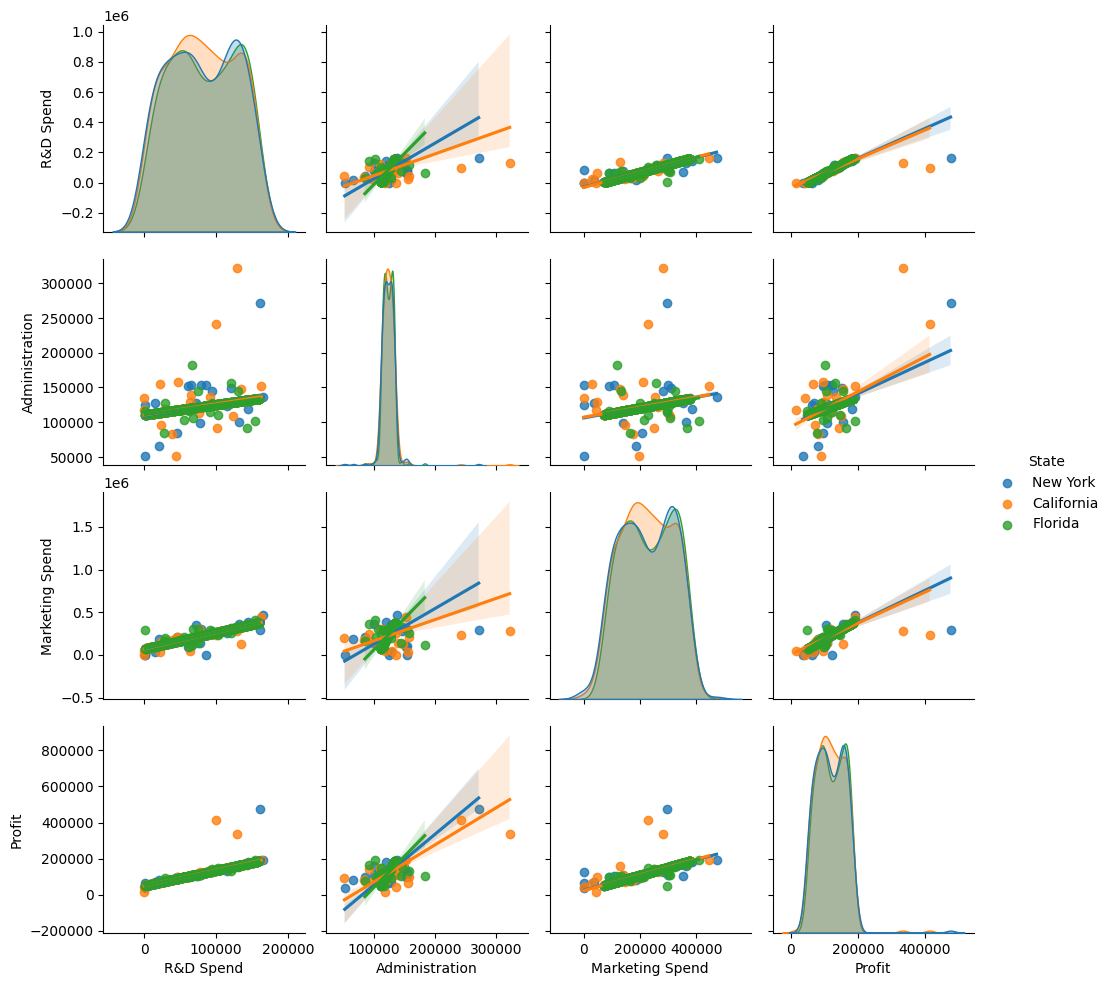

In [5]:
plt.figure(figsize=(10,5))
sns.pairplot(df,hue="State",kind="reg")

**Here Pairplot analyze R&D spend and Marketing spend are correlated with profit and Administration is Not correlated with profit**

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [7]:
dummies=pd.get_dummies(df.State)

In [8]:
merge=pd.concat([df,dummies],axis="columns")

In [9]:
final=merge.drop(["State"],axis="columns")

In [10]:
final.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
X=final.drop(["Profit"],axis="columns").values

In [12]:
y=df["Profit"].values

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
model=LinearRegression()

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
len(X_train),len(y_train)

(800, 800)

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.score(X_train,y_train)

0.962685405227249

In [19]:
model.score(X_test,y_test)

0.9014193723197519

In [20]:
model.coef_

array([ 5.79213746e-01,  9.25475482e-01,  7.70400834e-02, -2.07610681e+02,
       -2.32252575e+02,  4.39863256e+02])

In [21]:
model.intercept_

-59200.9141985093

In [22]:
y_pred = model.predict(X)
y_pred

array([200053.32246489, 209064.52590197, 154477.30266442, 164211.05175765,
       135667.84598394, 137954.79862072, 164630.85963465, 175673.29009497,
       172701.28943636, 136104.44967933, 119603.00604205, 103092.3582019 ,
       132013.54885044, 138737.42446514, 174682.18234016, 141218.73992863,
       118678.53453629, 152100.96900868, 122096.73046104, 133367.97220418,
       113149.28907572, 152048.53273023, 120425.66536351, 101031.99676955,
        88576.23979481, 117827.84383601, 127919.89437325, 128549.47842139,
       156960.91646005, 129119.91414551,  90518.81592378, 124768.20358389,
       100458.7508349 ,  84622.35580708, 129663.81977897,  62433.31862455,
        90251.5112443 ,  28757.84761782,  28262.23673885,  53204.94456729,
        80270.03393836,  47791.37384159,  54707.78881773,  70846.8319621 ,
        98889.32325255,  56865.56952041,  71403.55132844,  65925.76922354,
       -10560.07143028,  52337.25015682, 124108.65874962,  81635.54453997,
       125846.88383622, 1